In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
house_prd = pd.read_csv('/content/house-prices.csv')    #astype(float),
house_prd

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [ ]:
house_prd.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [ ]:
X=house_prd['SqFt'].values   # Feature (independent variable)
y=house_prd['Price'].values  # Target (dependent variable)

#Splitting the dataset into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
# Instantiate a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making prediction
Y_pred=model.predict(X_test)

In [ ]:
#Finding intercept and coefficient
print("m = ",model.intercept_)
print("c = ",model.coef_)

m =  -17889.356644513682
c =  [74.03513223]


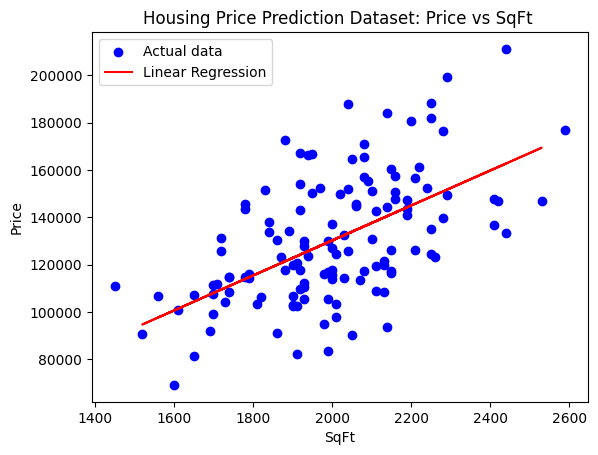

In [ ]:
#visulizing the linear regression line
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, Y_pred, color='red', label='Linear Regression')
plt.title('Housing Price Prediction Dataset: Price vs SqFt ')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, Y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 415765840.64103884
R^2 Score: 0.2945934454247471


In [ ]:
#X = (X - X.mean()) / X.std()

#X = np.c_[np.ones(X.shape[0]), X]

learning_rate = 0.01
num_iterations = 1000

theta = np.random.rand(2)


In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = 1/(2*m) * np.sum(error**2)
    return cost


In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        theta -= (learning_rate/m) * error
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


In [ ]:
# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

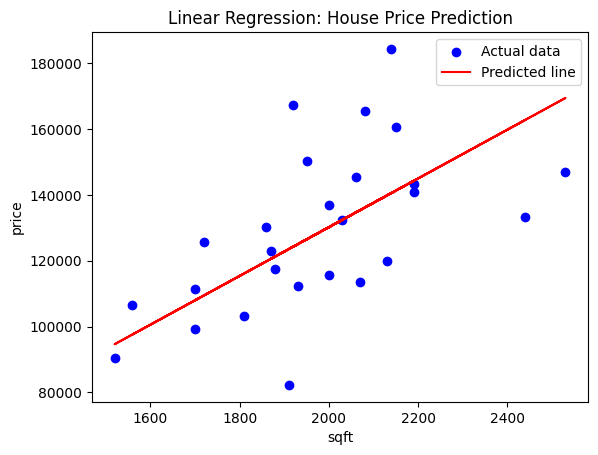

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, Y_pred, color='red', label='Predicted line')
plt.xlabel('sqft')
plt.ylabel('price')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.show()


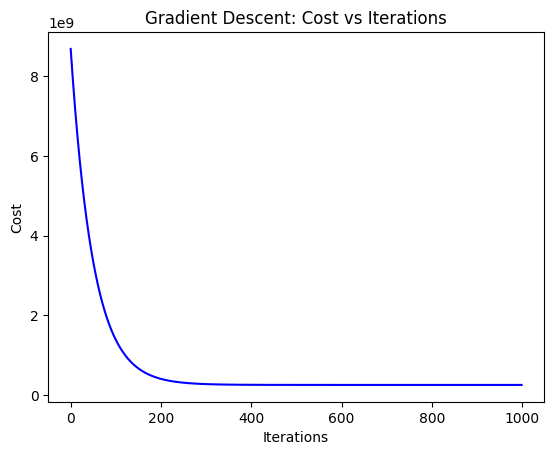

In [ ]:
plt.plot(cost_history,color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost vs Iterations')
plt.show()

In [ ]:
#Prepare Input Data for Prediction
input_data_df = pd.DataFrame(np.array(['2175']).reshape(1, -1),
columns=['SqFt'])
#Make Predictions
y_pred = model.predict(input_data_df)
print(y_pred)

[143137.05595235]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
